# Otwarte zbiory danych do nauki analizy danych i uczenia maszynowego

W tym notatniku poznasz kilka **klasycznych, otwartych zbiorów danych**, które bardzo często pojawiają się w kursach data science i uczenia maszynowego:

- Iris
- Wine
- Breast Cancer
- Digits
- MNIST
- California Housing (regresja)
- Titanic (przez seaborn)

Dla każdego zbioru:
- pokażemy, jak go **wczytać w Pythonie**,
- zamienimy dane na `pandas.DataFrame` (tam gdzie ma sens),
- krótko opiszemy, do czego nadaje się dany zbiór (klasyfikacja, regresja, PCA itd.).

Na końcu zrobimy prosty przykład **PCA** na zbiorze Iris.



## Instalacja potrzebnych bibliotek (opcjonalnie)

Jeżeli pracujesz w Google Colab lub w świeżym środowisku, możesz potrzebować:

- `scikit-learn`
- `pandas`
- `matplotlib`
- `seaborn`
- `tensorflow` (do MNIST z Keras)

Jeśli masz je już zainstalowane, tę komórkę możesz pominąć.


In [1]:
# Odkomentuj w razie potrzeby:

!pip install pandas scikit-learn matplotlib seaborn tensorflow



## Import bibliotek


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import (
    load_iris,
    load_wine,
    load_breast_cancer,
    load_digits,
    fetch_california_housing
)

from sklearn.decomposition import PCA

import seaborn as sns  # użyjemy tylko do wczytania datasetu Titanic

# Do MNIST:
from tensorflow.keras.datasets import mnist


## Zbiór IRIS

- 150 rekordów (kwiaty irysa),
- 4 cechy: długość/szerokość działek i płatków,
- 3 gatunki (klasy: 0, 1, 2).

Nadaje się idealnie do:
- **klasyfikacji**,
- **PCA** (redukcja do 2D i wizualizacja),
- **clusteringu** (np. k-means).


In [3]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

print("Pierwsze 5 wierszy Iris:")
display(iris_df.head())

print("\nInformacje o zbiorze Iris:")
iris_df.info()


Pierwsze 5 wierszy Iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Informacje o zbiorze Iris:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### PCA na zbiorze IRIS

PCA (Principal Component Analysis) to metoda **redukcji wymiarów**:
- bierzemy dane o wielu cechach,
- przekształcamy je na kilka „głównych składowych” (component 1, component 2),
- staramy się zachować jak najwięcej informacji.

Poniżej: sprowadzimy 4 cechy Iris do 2 wymiarów i narysujemy wykres.



Wyjaśniona wariancja (składowe PCA): [0.92461872 0.05306648]


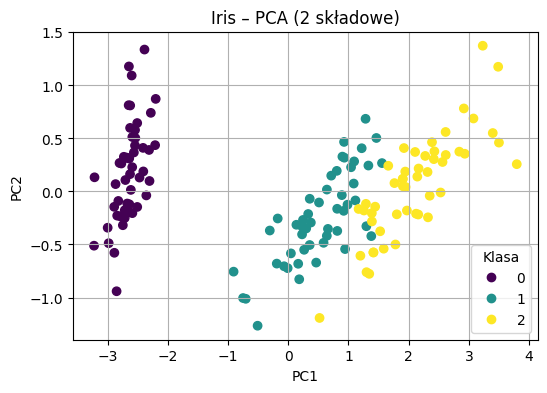

In [5]:
X_iris = iris.data
y_iris = iris.target

pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

print("Wyjaśniona wariancja (składowe PCA):", pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris – PCA (2 składowe)")
plt.legend(*scatter.legend_elements(), title="Klasa")
plt.grid(True)
plt.show()


## Zbiór WINE

- 178 win,
- 13 cech chemicznych (np. alkohol, kwasowość),
- 3 klasy (typ wina).

Bardzo dobry do:
- klasyfikacji,
- PCA (redukcja wymiarów),
- analizy korelacji między cechami.


In [6]:
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["target"] = wine.target

print("Pierwsze 5 wierszy Wine:")
display(wine_df.head())

print("\nInformacje o zbiorze Wine:")
wine_df.info()


Pierwsze 5 wierszy Wine:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Informacje o zbiorze Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 no

## Zbiór Breast Cancer

- 569 próbek,
- 30 cech,
- 2 klasy: guz **łagodny** vs **złośliwy**.

Świetny do:
- klasyfikacji binarnej,
- ćwiczenia metryk (accuracy, precision, recall, ROC AUC),
- selekcji cech.


In [7]:
breast = load_breast_cancer()

breast_df = pd.DataFrame(breast.data, columns=breast.feature_names)
breast_df["target"] = breast.target

print("Pierwsze 5 wierszy Breast Cancer:")
display(breast_df.head())

print("\nInformacje o zbiorze Breast Cancer:")
breast_df.info()


Pierwsze 5 wierszy Breast Cancer:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Informacje o zbiorze Breast Cancer:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    fl

## Zbiór DIGITS

- 1797 obrazków cyfr (0–9),
- każdy obraz: 8×8 pikseli (64 cechy),
- klasy: cyfry 0–9.

Nadaje się do:
- klasyfikacji obrazów (prosty przykład),
- PCA (redukcja wymiarów),
- wizualizacji danych obrazowych.


Kształt X_digits: (1797, 64)
Kształt y_digits: (1797,)


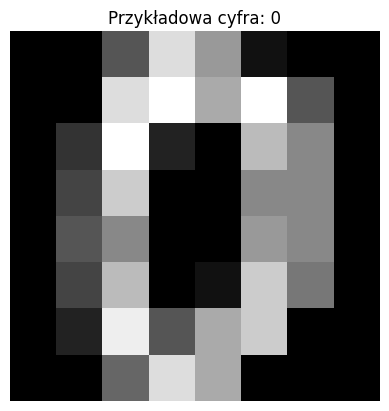

In [8]:
digits = load_digits()
X_digits = digits.data       # każda próbka = spłaszczony obraz 8x8
y_digits = digits.target

print("Kształt X_digits:", X_digits.shape)
print("Kształt y_digits:", y_digits.shape)

# Podgląd pierwszego obrazu jako 8x8
plt.imshow(digits.images[0], cmap="gray")
plt.title(f"Przykładowa cyfra: {y_digits[0]}")
plt.axis("off")
plt.show()


### PCA na zbiorze DIGITS

Zastosujemy PCA do redukcji 64 wymiarów do 2 i narysujemy cyfry w 2D.


Wyjaśniona wariancja (PCA Digits): [0.14890594 0.13618771]


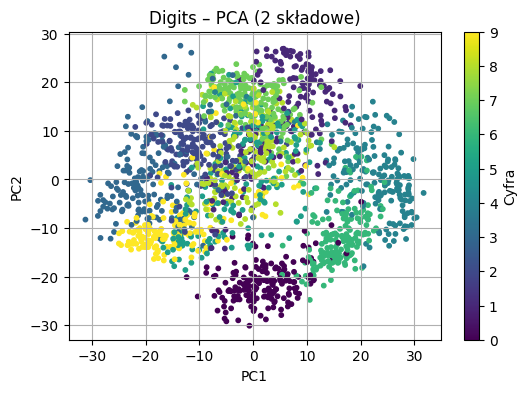

In [9]:
pca_digits = PCA(n_components=2)
X_digits_pca = pca_digits.fit_transform(X_digits)

print("Wyjaśniona wariancja (PCA Digits):", pca_digits.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=y_digits, s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits – PCA (2 składowe)")
plt.colorbar(scatter, label="Cyfra")
plt.grid(True)
plt.show()


## Zbiór MNIST (pisane ręcznie cyfry 0–9)

- 60 000 obrazów do trenowania, 10 000 do testu,
- każdy obraz: 28×28 pikseli (szarość),
- klasy: cyfry 0–9.

To klasyk do:
- sieci konwolucyjnych (CNN),
- prostych klasyfikatorów na obrazach,
- PCA/t-SNE na obrazach.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Kształt X_train: (60000, 28, 28)
Kształt y_train: (60000,)


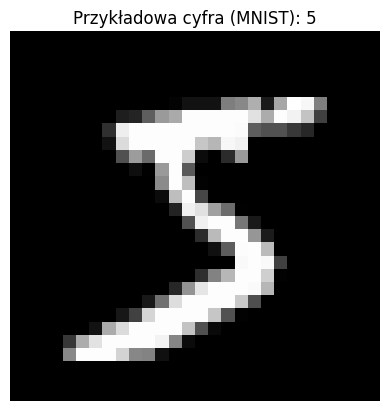

In [10]:
from tensorflow.keras.datasets import mnist

# Dane zostaną automatycznie pobrane przy pierwszym uruchomieniu (internet wymagany)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Kształt X_train:", X_train.shape)
print("Kształt y_train:", y_train.shape)

# Podgląd przykładowej cyfry
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Przykładowa cyfra (MNIST): {y_train[0]}")
plt.axis("off")
plt.show()


## Zbiór California Housing (regresja)

Zamiast przestarzałego Boston Housing, używa się obecnie:

- **California Housing**:
  - dane o cenach domów w Kalifornii,
  - kilka cech dot. demografii i nieruchomości,
  - cel (target): `MedHouseValue` – mediana wartości domu.

Nadaje się świetnie do:
- regresji liniowej,
- regresji drzewiastej (RandomForest, GradientBoosting),
- ćwiczenia metryk regresji (MAE, RMSE, R²).


In [12]:
california = fetch_california_housing()

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["target"] = california.target

print("Pierwsze 5 wierszy California Housing:")
display(california_df.head())

print("\nInformacje o zbiorze California Housing:")
california_df.info()


Pierwsze 5 wierszy California Housing:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Informacje o zbiorze California Housing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## (Opcjonalnie) Zbiór Titanic z pliku CSV

Zbiór Titanic jest dostępny m.in. na Kaggle i świetnie nadaje się do:
- czyszczenia danych (missing values),
- kodowania zmiennych kategorycznych,
- klasyfikacji (przeżył / nie przeżył).

Przykład wczytania lokalnego pliku `titanic.csv`:


In [14]:
df_titanic = sns.load_dataset("titanic")

print("Titanic – rozmiar danych:", df_titanic.shape)
display(df_titanic.head())


Titanic – rozmiar danych: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Podsumowanie

W tym notatniku:

- nauczyłeś/aś się **wczytywać klasyczne otwarte zbiory danych**:
  - Iris, Wine, Breast Cancer, Digits, MNIST, California Housing, Titanic,
- zamieniłeś/aś je na `pandas.DataFrame` (tam, gdzie to wygodne),
- zobaczyłeś/aś podstawowe właściwości (kształt danych, przykładowe wiersze),
- zrobiłeś/aś prosty przykład **PCA** na zbiorze Iris.

Te zbiory są świetnym punktem startowym do:
- klasyfikacji,
- regresji,
- redukcji wymiarów (PCA),
- klasteryzacji,
- ćwiczenia czyszczenia i przygotowania danych.

Możesz teraz:
- dorzucić modele (np. `LogisticRegression`, `RandomForestClassifier`),
- porównywać różne metryki,
- eksperymentować z innymi metodami redukcji wymiarów (np. t-SNE, UMAP).


# Przykłady klasyfikacji, regresji i klasteryzacji dla klasycznych datasetów

# Klasyczne zbiory danych: klasyfikacja, regresja i klasteryzacja

W tym notatniku wykorzystamy dobrze znane otwarte zbiory danych:

- **Iris**
- **Wine**
- **Breast Cancer**
- **Digits**
- **California Housing** (regresja)

Dla każdego zbioru wykonamy:

- przykład **klasyfikacji** (gdy dane mają etykiety klas),
- przykład **klasteryzacji** (KMeans),
- przykład **regresji** (tam, gdzie to ma sens – np. California Housing).

Każdy przykład będzie krótki i podstawowy, aby łatwo go zrozumieć i modyfikować.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import (
    load_iris,
    load_wine,
    load_breast_cancer,
    load_digits,
    fetch_california_housing
)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error


## IRIS – klasyfikacja, klasteryzacja

In [17]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Iris shape:", X_iris.shape)


Iris shape: (150, 4)


## Przykład Regresji Logistycznej - klasyfikacja

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Iris – accuracy (Logistic Regression):", accuracy_score(y_test, y_pred))


Iris – accuracy (Logistic Regression): 1.0


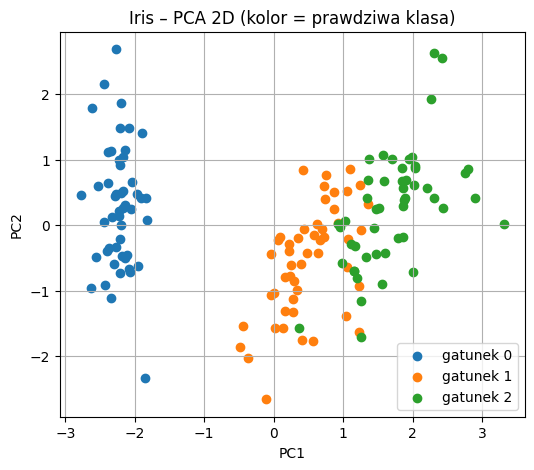

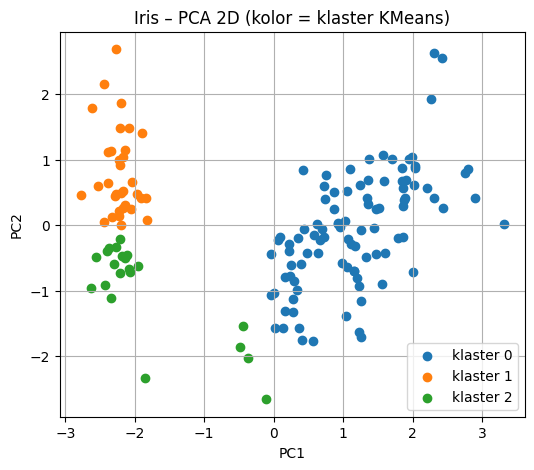

In [19]:
# Skalowanie danych przed PCA i KMeans (lepsze wyniki)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# PCA do 2 wymiarów
pca_iris = PCA(n_components=2)
X_iris_2d = pca_iris.fit_transform(X_iris_scaled)

# Klasteryzacja KMeans
kmeans_iris = KMeans(n_clusters=3, random_state=42)
clusters_iris = kmeans_iris.fit_predict(X_iris_scaled)

# Wykres 1: prawdziwe klasy
plt.figure(figsize=(6, 5))
for label in np.unique(y_iris):
    plt.scatter(
        X_iris_2d[y_iris == label, 0],
        X_iris_2d[y_iris == label, 1],
        label=f"gatunek {label}"
    )
plt.title("Iris – PCA 2D (kolor = prawdziwa klasa)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# Wykres 2: klastry KMeans
plt.figure(figsize=(6, 5))
for label in np.unique(clusters_iris):
    plt.scatter(
        X_iris_2d[clusters_iris == label, 0],
        X_iris_2d[clusters_iris == label, 1],
        label=f"klaster {label}"
    )
plt.title("Iris – PCA 2D (kolor = klaster KMeans)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


## WINE – klasyfikacja i klasteryzacja + wizualizacje

In [20]:
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Wine – kształt X:", X_wine.shape)
print("Wine – kształt y:", y_wine.shape)


Wine – kształt X: (178, 13)
Wine – kształt y: (178,)


### Przykład klasyfikacja (RandomForestClassifier)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

clf_wine = RandomForestClassifier(random_state=42)
clf_wine.fit(X_train, y_train)
y_pred = clf_wine.predict(X_test)

print("Wine – accuracy (Random Forest):", accuracy_score(y_test, y_pred))


Wine – accuracy (Random Forest): 1.0


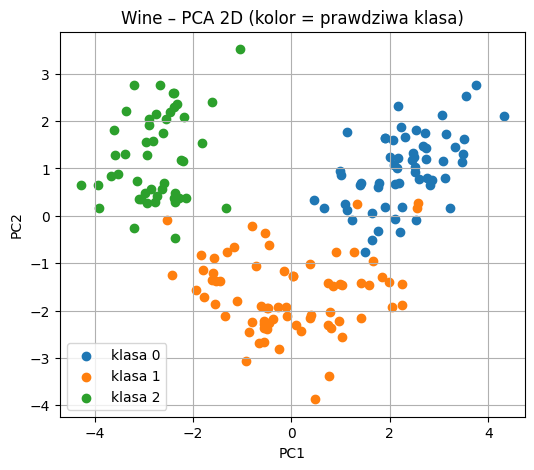

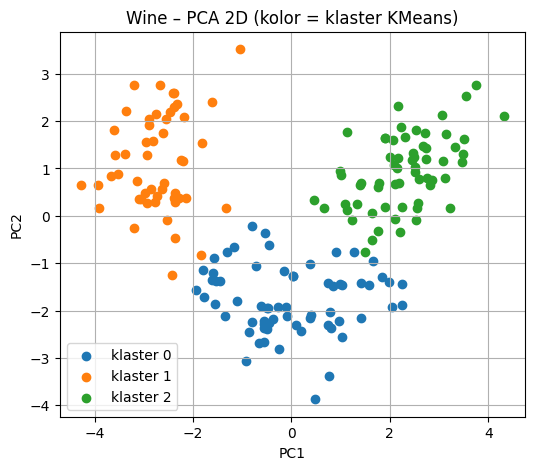

In [22]:
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

pca_wine = PCA(n_components=2)
X_wine_2d = pca_wine.fit_transform(X_wine_scaled)

kmeans_wine = KMeans(n_clusters=3, random_state=42)
clusters_wine = kmeans_wine.fit_predict(X_wine_scaled)

# Prawdziwe klasy
plt.figure(figsize=(6, 5))
for label in np.unique(y_wine):
    plt.scatter(
        X_wine_2d[y_wine == label, 0],
        X_wine_2d[y_wine == label, 1],
        label=f"klasa {label}"
    )
plt.title("Wine – PCA 2D (kolor = prawdziwa klasa)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# Klastry
plt.figure(figsize=(6, 5))
for label in np.unique(clusters_wine):
    plt.scatter(
        X_wine_2d[clusters_wine == label, 0],
        X_wine_2d[clusters_wine == label, 1],
        label=f"klaster {label}"
    )
plt.title("Wine – PCA 2D (kolor = klaster KMeans)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


## Przykłąd CALIFORNIA HOUSING – regresja i klasteryzacja + wizualizacje

In [24]:
cal = fetch_california_housing()
X_cal = cal.data
y_cal = cal.target

print("California – kształt X:", X_cal.shape)
print("California – kształt y:", y_cal.shape)


California – kształt X: (20640, 8)
California – kształt y: (20640,)


### Przykład Regresji liniowej

California Housing – MSE: 0.5558915986952422


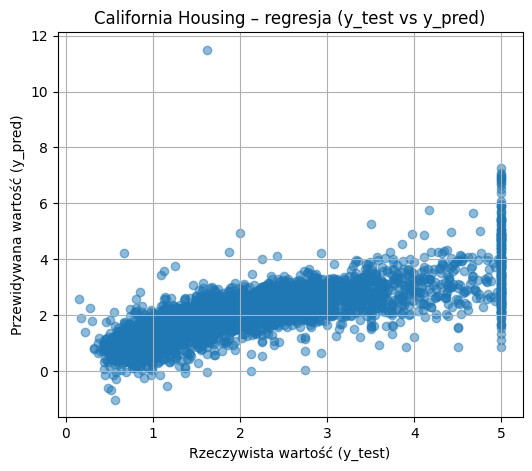

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42
)

reg_cal = LinearRegression()
reg_cal.fit(X_train, y_train)
y_pred = reg_cal.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("California Housing – MSE:", mse)

# Wykres: wartości rzeczywiste vs przewidywane
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Rzeczywista wartość (y_test)")
plt.ylabel("Przewidywana wartość (y_pred)")
plt.title("California Housing – regresja (y_test vs y_pred)")
plt.grid(True)
plt.show()


## Przykład grupowanie oraz wizualizacja z wykorzystaniem PCA

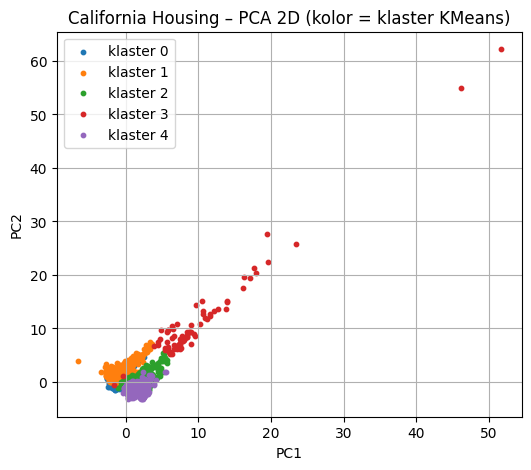

In [26]:
scaler_cal = StandardScaler()
X_cal_scaled = scaler_cal.fit_transform(X_cal)

pca_cal = PCA(n_components=2)
X_cal_2d = pca_cal.fit_transform(X_cal_scaled)

kmeans_cal = KMeans(n_clusters=5, random_state=42)
clusters_cal = kmeans_cal.fit_predict(X_cal_scaled)

plt.figure(figsize=(6, 5))
for label in np.unique(clusters_cal):
    plt.scatter(
        X_cal_2d[clusters_cal == label, 0],
        X_cal_2d[clusters_cal == label, 1],
        s=10,
        label=f"klaster {label}"
    )
plt.title("California Housing – PCA 2D (kolor = klaster KMeans)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()
